In [20]:
exec(open("object.py").read(), globals())

In [21]:
Alpha = [1., 1.5, 2., 3., 4., 5., 7., 9.]
Beta = [1., 1.5, 2., 3., 4., 5., 7., 9.]

Param_freq = {"p":0.05}
Param_ampl = {"scale":0.07}
Param_coupled = {"alpha":3,
                 "beta":2}

Fire = {"frequence": "bernoulli",
        "param_freq" : Param_freq,
        "amplitude": "exponential",
        "param_amplitude" : Param_ampl,
        "type" : "proportionnal",
        "coef_W_N" : 5}
Fire_param["Param_coupled"] = Param_coupled

finalTime = 100
Number_of_simulation = 200
Collapse = np.zeros((len(Alpha), len(Beta)))
Variability_always = np.zeros_like(Collapse)
Variability_until = np.zeros_like(Collapse)
Variability_only = np.zeros_like(Collapse)
Variability_10 = np.zeros_like(Collapse)
Collapse_10_b = np.zeros_like(Collapse)
Collapse_10_m = np.zeros_like(Collapse)


for i, alpha in enumerate(Alpha):
    for j, beta in enumerate(Beta):
        Param_coupled = {"alpha":alpha,
                         "beta":beta}
        Fire_param["Param_coupled"] = Param_coupled
        Collapse[i,j], Variability_always[i,j], Variability_until[i,j], Variability_only[i,j], Variability_10[i,j], Collapse_10_b[i,j], Collapse_10_m[i,j] = all_measure(Number_of_simulation = Number_of_simulation, mean = True, Fire_param = Fire_param, finalTime = finalTime) 

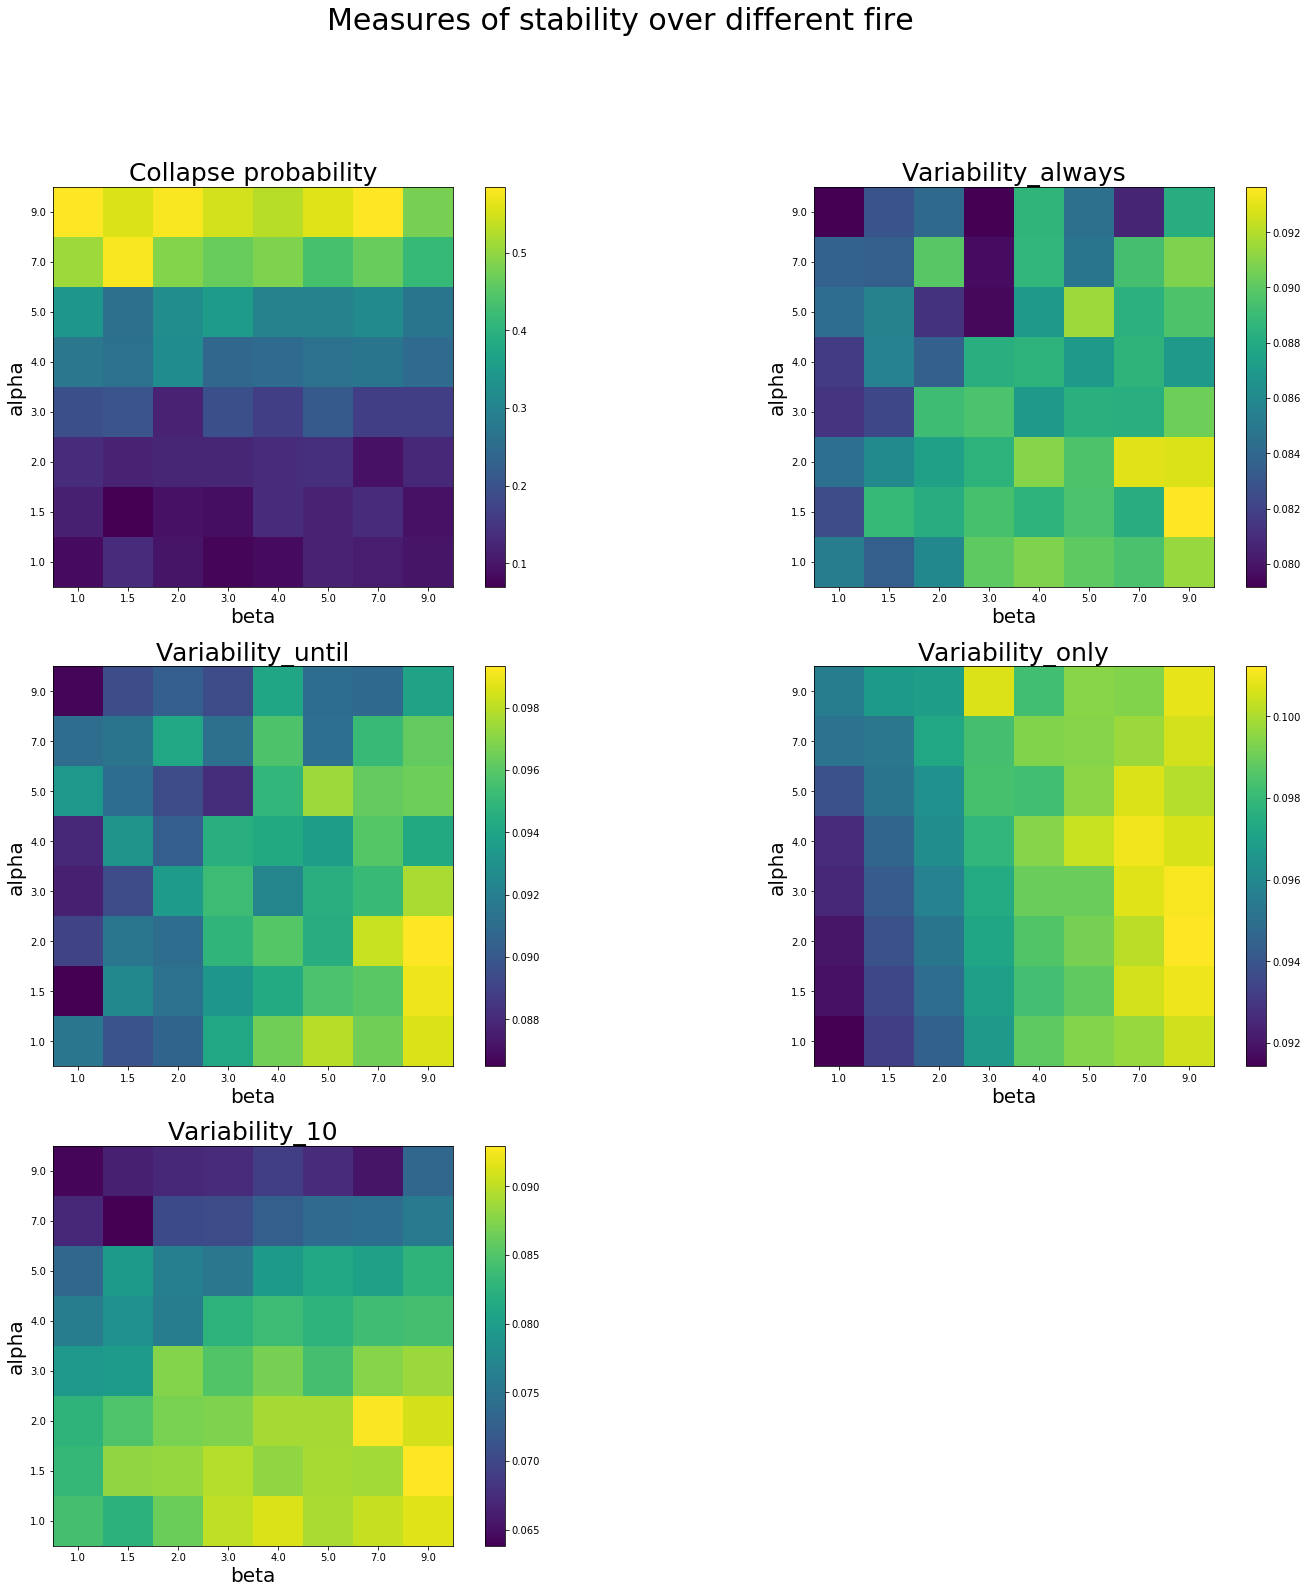

In [22]:
plt.figure(figsize = (25, 25))
plt.suptitle("Measures of stability over different fire", fontsize=30)

Compute_measures = {"Collapse probability": Collapse,
                    "Variability_always": Variability_always,
                    "Variability_until": Variability_until, 
                    "Variability_only":Variability_only,
                    "Variability_10":Variability_10}

for i, compute_measures in enumerate(Compute_measures.keys()):
    plt.subplot(3,2,i+1)
    plt.imshow(Compute_measures[compute_measures], origin = "bottom")
    plt.yticks(np.arange(len(Alpha)), Alpha)
    plt.xticks(np.arange(len(Beta)), Beta)
    plt.colorbar()
    plt.title(compute_measures, fontsize=25)
    plt.ylabel("alpha", fontsize=20)
    plt.xlabel("beta", fontsize=20)
plt.savefig("plot/alpha_beta")